## EXPLORE Data Science Academy Classification Hackathon
### Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

<img src="images/South_Africa_languages_2011.jpg" alt="An image of South Africa's home-language speakers in 2011. (NB: This image might not be visible on GitHub. View it on VS Code or Jupyter Notebook)" width="650" />

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

**In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.**

# Dataset Description

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.



The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.
File descriptions


**train_set.csv** - the training set

**test_set.csv** - the test set

**sample_submission.csv** - a sample submission file in the correct format

### Language IDs


        afr - Afrikaans

        eng - English

        nbl - isiNdebele

        nso - Sepedi

        sot - Sesotho

        ssw - siSwati

        tsn - Setswana

        tso - Xitsonga

        ven - Tshivenda

        xho - isiXhosa

        zul - isiZulu

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a id="one"></a>
# Importing some packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import string
import re

from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, make_scorer, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>

# Loading the data
<a href=#cont>Back to Table of Contents</a>

In [2]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

<a id="three"></a>
# Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

#### Below, the first 5 rows of both data sets are observed.

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


#### Below, the number of rows and columns in both data sets are observed.

In [5]:
df_train.shape, df_test.shape

((33000, 2), (5682, 2))

#### From above, it is observed that the df_train has 33 000 rows and df_test has 5 682 rows. Both data sets have 2 columns.
- df_train has columns lang_id, and text.
- df_test has columns index, and text.
</br></br>

#### Checking if the data sets have any missing values or empty rows

In [6]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [7]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

#### From above, it is observed that the total number of missing values in both data sets is zero. The data sets do not have null values. </br></br></br>

#### Viewing the entire content of a few random texts in df_train, to better undestand the data.

In [8]:
print(df_train.loc[0, 'text'])

umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika


In [9]:
print(df_train.loc[2, 'text'])

the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months


In [10]:
print(df_train.loc[20, 'text'])

maikemisetso a magolo a lenaneo ke go phasalatsa ditlamelo le ditshono tsa dikgwebo go maatlafatsa ikonomi ya baagi ba selegae gore ba kgone go itumelela melemo ya ditshono tsa leruri tsa ditiro le seemo se se tokafetseng sa botshelo


#### Below, the number of texts for each language is observed.

In [11]:
count = df_train.groupby('lang_id').count()['text'].reset_index().sort_values(by=['text'])
count

,lang_id,text
0,afr,3000
1,eng,3000
2,nbl,3000
3,nso,3000
4,sot,3000
5,ssw,3000
6,tsn,3000
7,tso,3000
8,ven,3000
9,xho,3000


#### From above, it is observed that each language has 3000 texts.</br></br></br></br>

#### Representing the number of texts in each language on a countplot

<AxesSubplot:xlabel='lang_id', ylabel='count'>

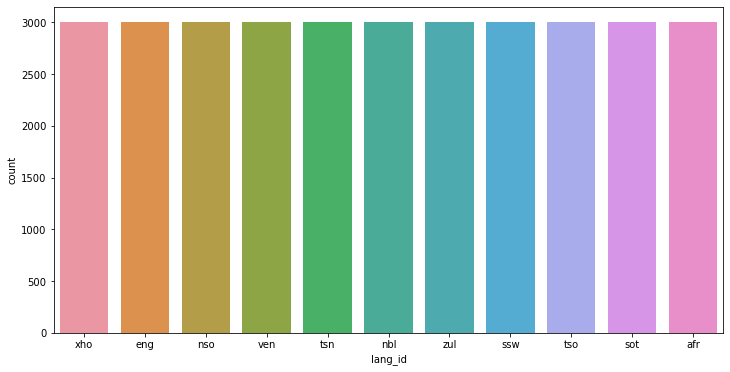

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='lang_id', data=df_train)

#### From the countplot above, it is clearly observed that each language is represented 3000 times. </br></br></br></br>

<a id="four"></a>
# Data Engineering
<a href=#cont>Back to Table of Contents</a>

In this section, these changes are made:
- Changing text to lowercase
- Removing punctuation, speacial characters, and numbers
- Removing stopwords using the count vectorizer


In [13]:
X = df_train["text"]
y = df_train["lang_id"] 
X_test_text = df_test['text'] 

In [14]:
df_train_list = []      # initializing the list
for text in X:    # iterating through all the text

    # Removing symbols, special characters and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        
    # Converting the text to lower case
    text = text.lower()
        
    df_train_list.append(text)

In [15]:
df_test_list = []
# iterating through all the text
for text in X_test_text:
    
    # Removing symbols, special characters and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        
    # Converting the text to lowercase
    text = text.lower()

    df_test_list.append(text)

In [16]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words = 'english')
X = vect.fit_transform(X)

In [17]:
# Preparing the test data
X_test_text = vect.transform(X_test_text)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="five"></a>
# Modeling
<a href=#cont>Back to Table of Contents</a>


### Model 1 : Naive Bayes Classifier

In [19]:
nbc = MultinomialNB()

# Fitting data into the Naive Bayes model
nbc.fit(X_train, y_train)

# Predicting the y labels
nbc_y_pred = nbc.predict(X_test)

# F1 Score
nbc_f1 = f1_score(y_test, nbc_y_pred, average='macro')

#metrics reporting
acc = accuracy_score(y_test, nbc_y_pred)

report = classification_report(y_test,nbc_y_pred)

print('F1 score =', nbc_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 score = 0.9990909913049045
Accuracy =  0.9990909090909091
Classification Report:
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Model 2: Logistic Regression

In [20]:
lg = LogisticRegression()

# Fitting data into the Naive Bayes model
lg.fit(X_train, y_train)

# Predicting the y labels
lg_y_pred = lg.predict(X_test)

# F1 Score
lg_f1 = f1_score(y_test, lg_y_pred, average='macro')

#metrics reporting
acc = accuracy_score(y_test, lg_y_pred)

report = classification_report(y_test,lg_y_pred)

print('F1 score =', lg_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 score = 0.9928331788974943
Accuracy =  0.9928787878787879
Classification Report:
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       0.98      1.00      0.99       615
         nbl       0.98      0.98      0.98       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      0.99      0.99       584
         tsn       0.99      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.99      0.99       609
         zul       0.98      0.97      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### Model 3 : Support Vector Classifier

In [21]:
svc = LinearSVC()

# Fitting data into the Naive Bayes model
svc.fit(X_train, y_train)

# Predicting the y labels
svc_y_pred = svc.predict(X_test)

# F1 Score
svc_f1 = f1_score(y_test, svc_y_pred, average='macro')

#metrics reporting
acc = accuracy_score(y_test, svc_y_pred)

report = classification_report(y_test, svc_y_pred)

print('F1 score =', svc_f1)

print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 score = 0.9942037375981442
Accuracy =  0.9942424242424243
Classification Report:
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      0.99      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.99      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### Model 4: K Nearest Neighbors

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)

# Fitting data into the Naive Bayes model
knn.fit(X_train, y_train)

# Predicting the y labels
knn_y_pred = knn.predict(X_test)

#metrics reporting
# F1 Score
knn_f1 = f1_score(y_test, knn_y_pred, average='macro')
acc = accuracy_score(y_test, knn_y_pred)

report = classification_report(y_test, knn_y_pred)

print('F1 Score = ', knn_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 Score =  0.40138246189274585
Accuracy =  0.3881818181818182
Classification Report:
               precision    recall  f1-score   support

         afr       1.00      0.70      0.82       583
         eng       0.14      1.00      0.24       615
         nbl       0.94      0.03      0.05       583
         nso       0.86      0.54      0.66       625
         sot       0.99      0.57      0.73       618
         ssw       1.00      0.02      0.03       584
         tsn       0.86      0.51      0.64       598
         tso       1.00      0.41      0.58       561
         ven       1.00      0.41      0.59       634
         xho       1.00      0.01      0.02       609
         zul       0.94      0.03      0.05       590

    accuracy                           0.39      6600
   macro avg       0.88      0.38      0.40      6600
weighted avg       0.88      0.39      0.40      6600



### Model 5: Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

# Fitting data into the Naive Bayes model
rfc.fit(X_train, y_train)

# Predicting the y labels
rf_y_pred = rfc.predict(X_test)

#metrics reporting
# F1 Score
rf_f1 = f1_score(y_test, rf_y_pred, average='macro')
acc = accuracy_score(y_test, rf_y_pred)

report = classification_report(y_test, rf_y_pred)

print('F1 Score = ', rf_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 Score =  0.9819060680185657
Accuracy =  0.9819696969696969
Classification Report:
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.95      1.00      0.97       615
         nbl       0.99      0.95      0.96       583
         nso       1.00      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.96      0.97       584
         tsn       0.99      1.00      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.98      0.95      0.97       609
         zul       0.91      0.96      0.94       590

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600



### Predicting on the test data set

In [34]:
test_pred = nbc.predict(X_test_text)

In [35]:
# Adding the predictions to df_test
df_test['lang_id'] = nbc.predict(X_test_text)

### Creating submission file for Kaggle

In [36]:
df_test[['index', 'lang_id']].to_csv('nbc_submission.csv', index=False)

In [37]:
# Checking how the generated csv file looks
my_sub = pd.read_csv('nbc_submission.csv')
my_sub.head()

,index,lang_id
0,1,eng
1,2,nbl
2,3,eng
3,4,ssw
4,5,eng


<a id="six"></a>
# Model Performance
<a href=#cont>Back to Table of Contents</a>

In this section, a horizontal bar graph of the f1 scores for the different models is plotted.


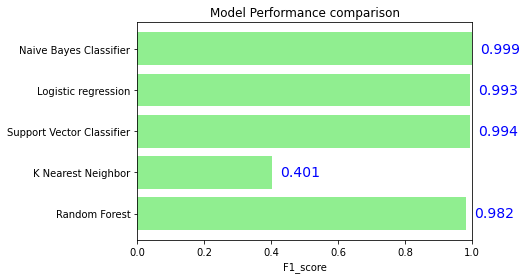

In [27]:
#Bar graph with the f1 score for each model\n",
models = ['Naive Bayes Classifier', 'Logistic regression', 'Support Vector Classifier', 'K Nearest Neighbor', 'Random Forest']
f1_score = [nbc_f1, lg_f1, svc_f1, knn_f1, rf_f1]
fig, ax = plt.subplots()
hbars = ax.barh(models, f1_score, align='center',color=['lightgreen'])
ax.set_yticks(models, labels= models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('F1_score')
ax.set_title('Model Performance comparison')
ax.bar_label(hbars, fmt='%.3f',padding=8, color='b', fontsize=14)
ax.set_xlim(right=1)  

plt.show()

### Conclusion

It is observed that the Naive Bayes Classifier perfomed the best in terms of classifying which language a text belongs to, which is also the model that gave the highest score of 0.95864 on Kaggle.